In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# toutoring
dir(session.query(measurement))

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__clause_element__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_context_option',
 '_all_selected_columns',
 '_annotate',
 '_annotations',
 '_annotations_cache_key',
 '_assert_no_memoizations',
 '_auto_correlate',
 '_clone',
 '_clone_annotations_traverse_internals',
 '_compile_context',
 '_compile_options',
 '_compile_state',
 '_copy_internals',
 '_correlate',
 '_current_path',
 '_deannotate',
 '_distinct',
 '_distinct_on',
 '_effective_plugin_target',
 '_enable_assertions',
 '_entity_from_pre_ent_zero',
 '_executable_traverse_internals

In [10]:
# Find the most recent date in the data set.
for row in session.query(measurement.date).all()[-1]:
    print(row)

2017-08-23


In [11]:

from datetime import timedelta
# Given date
from datetime import datetime
given_date = datetime(2017, 8, 23)

# Calculate the date 12 months ago
last_12_months_date = given_date - timedelta(days=365)

print("Given Date:", given_date)
print("Last 12 Months Date:", last_12_months_date.date())

Given Date: 2017-08-23 00:00:00
Last 12 Months Date: 2016-08-23


In [12]:

last_12_mnths_of_prcp = session.query(measurement.date,measurement.prcp).\
    filter (measurement.date >= last_12_months_date.date()).all()
last_12_mnths_of_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
len(last_12_mnths_of_prcp)

2230

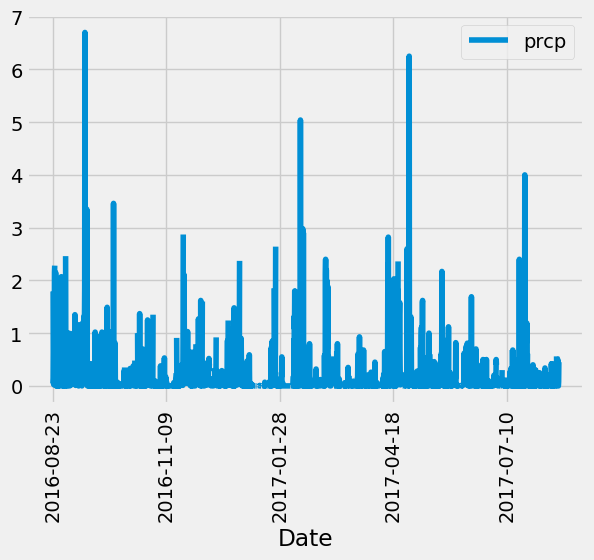

In [14]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(last_12_mnths_of_prcp, columns=['Date','prcp'])
# Convert the 'date' column to datetime
#df['Date'] = pd.to_datetime(df['Date'])
# Sort the DataFrame by the 'date' column
df= df.sort_values('Date')
df.plot(x='Date',y='prcp',rot=90)

plt.show()

In [15]:
df

,Date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
# prompt: # Use Pandas to calculate the summary statistics for the precipitation data

df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Sample data, replace this with your actual precipitation data.
precipitation = [10, 15, 20, 5, 12]

# Create a pandas Series from the list
precipitation_series = pd.Series(precipitation)

# Calculate summary statistics
summary_stats = precipitation_series.describe()
print(summary_stats)

count     5.00000
mean     12.40000
std       5.59464
min       5.00000
25%      10.00000
50%      12.00000
75%      15.00000
max      20.00000
dtype: float64


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
sel = [station.id]
query = session.query(*sel).all()[-1]
query
for row in query:
    print(row)

9


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station, func.count(measurement.station)]
query = session.query(*sel).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc())
for row in query.all():

  print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [21]:
dir(func)

['_FunctionGenerator__names',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'opts']

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]

query = session.query(*sel).\
    filter(( measurement.station) == "USC00519281")
for row in query.all():

  print(row)

(54.0, 85.0, 71.66378066378067)


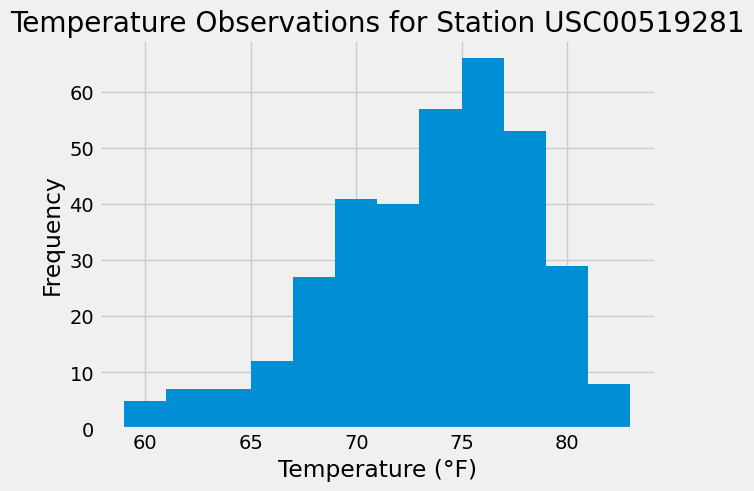

In [29]:
 # Using the most active station id
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import matplotlib.pyplot as plt
# Identify the most active station
sel = [measurement.station, func.count(measurement.station)]
query = session.query(*sel).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc())
most_active_station = query.first()[0]

# Calculate the date one year ago from the last date in data set
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
one_year_ago = (datetime.strptime(latest_date, '%Y-%m-%d') - timedelta(days=365)).strftime('%Y-%m-%d')

# Query the last 12 months of temperature observation data for this station
sel = [measurement.tobs]
query = session.query(*sel).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= one_year_ago)
temperature_observations = [row[0] for row in query.all()]

# Plot the results as a histogram
plt.hist(temperature_observations, bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station}')
plt.show()


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [30]:
latest_date

'2017-08-23'

# Close Session

In [24]:
# Close Session
session.close()